# 【大模型课程】假面骑士空我生成：
假面骑士是大家喜欢的特摄作品,不过作品时间跨度大，内容繁杂，寻找相关图片不易。本作品针对假面骑士空我，生成相关的系列图片。


## 创意背景


*例：如今人们的精神需求和文化产业日益发展，不过对于比较冷门的文化作品可能关注的人比较少，由此想收集相关图片是较为困难，本次图片生成器对应的主题是假面骑士空我，其除了基础形态外还有各种其他形态*

*1、推广特摄文化，降低接触门槛*  
*2、问相关二次创作者提供充足的素材* 

## 创意目标


*例：*
*1、实现空我图片的个性化定制*
*2、可生成各个不同的形态*

## 创意设计

**创意设计**从网络上下载不同的空我图片，加入到DreamBooth中进行微调




## 技术实现路径

基于 Linaqruf/anything-v3.0 训练，采用DreamBooth的技术并使用a photo of Neolle文本进行了训练。

用于微调的图片共10张，均为原神角色诺艾尔，batch_size取1，学习率是5e-6，共训练2000步。

## 创意总结

**创意总结**本打算可以生成空我各个不同的形态，不过最后只实现了一个形态，看来还是需要多加练习，更了解相关的应用

### 安装依赖

In [ ]:
# 安装依赖
! pip install -U paddlenlp ppdiffusers visualdl safetensors --user

In [ ]:
# 拉取paddlenlp的代码
! git clone -b develop https://github.com/PaddlePaddle/PaddleNLP.git

In [ ]:
!pip install -U paddlenlp ppdiffusers visualdl safetensors --user
# !unzip /home/aistudio/data/kuuga.zip

In [1]:
%cd ~/PaddleNLP/ppdiffusers/examples/dreambooth
! python -u train_dreambooth.py \
  --pretrained_model_name_or_path="Linaqruf/anything-v3.0" \
  --instance_data_dir="/home/aistudio/kuuga" \
  --output_dir="/home/aistudio/output" \
  --instance_prompt="a photo of kuuga" \
  --resolution=512 \
  --train_batch_size=1 \
  --gradient_accumulation_steps=1 \
  --learning_rate=5e-6 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --max_train_steps=2000 \
  --random_flip \
  --train_text_encoder \
  --checkpointing_steps=500

/home/aistudio/PaddleNLP/ppdiffusers/examples/dreambooth
[2023-06-07 10:05:03,646] [    INFO] - Found /home/aistudio/.paddlenlp/models/Linaqruf/anything-v3.0/tokenizer/tokenizer_config.json
[2023-06-07 10:05:03,647] [    INFO] - We are using <class 'paddlenlp.transformers.clip.tokenizer.CLIPTokenizer'> to load 'Linaqruf/anything-v3.0/tokenizer'.
[2023-06-07 10:05:03,647] [    INFO] - Already cached /home/aistudio/.paddlenlp/models/Linaqruf/anything-v3.0/tokenizer/vocab.json
[2023-06-07 10:05:03,647] [    INFO] - Already cached /home/aistudio/.paddlenlp/models/Linaqruf/anything-v3.0/tokenizer/merges.txt
[2023-06-07 10:05:03,647] [    INFO] - Already cached /home/aistudio/.paddlenlp/models/Linaqruf/anything-v3.0/tokenizer/added_tokens.json
[2023-06-07 10:05:03,647] [    INFO] - Already cached /home/aistudio/.paddlenlp/models/Linaqruf/anything-v3.0/tokenizer/special_tokens_map.json
[2023-06-07 10:05:03,647] [    INFO] - Already cached /home/aistudio/.paddlenlp/models/Linaqruf/anything-v3.

### 模型预测

In [2]:
from ppdiffusers import StableDiffusionPipeline

# 我们所需加载的模型地址，这里我们输入了训练时候使用的 output_dir 地址
model_path = "/home/aistudio/output"
pipe = StableDiffusionPipeline.from_pretrained(model_path)

W0607 10:25:16.063613  6766 gpu_resources.cc:61] Please NOTE: device: 0, GPU Compute Capability: 7.0, Driver API Version: 11.2, Runtime API Version: 11.2
W0607 10:25:16.068213  6766 gpu_resources.cc:91] device: 0, cuDNN Version: 8.2.
[2023-06-07 10:25:28,548] [    INFO] - loading configuration file /home/aistudio/output/text_encoder/config.json
[2023-06-07 10:25:28,552] [    INFO] - Model config CLIPTextConfig {
  "architectures": [
    "CLIPTextModel"
  ],
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "dropout": 0.0,
  "dtype": "float32",
  "eos_token_id": 2,
  "hidden_act": "quick_gelu",
  "hidden_size": 768,
  "initializer_factor": 1.0,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 77,
  "model_type": "clip_text_model",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "paddlenlp_version": null,
  "projection_dim": 768,
  "return_dict": true,
  "vocab_size": 49408
}

[2023-06-07 10:

  0%|          | 0/80 [00:00<?, ?it/s]

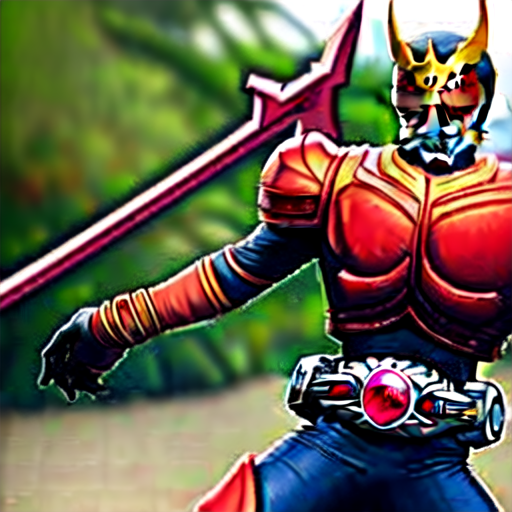

In [6]:
# "kuuga with a stick in a blue upper body"
# 提示词，生成一个带猫耳，绿色头发的诺艾尔
prompt = "a photo of kuuga"

# 生成
image = pipe(prompt, num_inference_steps=80,guidance_scale=50).images[0]
# 保存
# image.save("/home/aistudio/test.jpg")
# 展示图片
image.show()